In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
file_path = "construction_cost_prediction.csv"
data = pd.read_csv(file_path)
data




,building height,builtup area,number of stories,number of columns,number of rooms,building function,number of units,total project cost
0,2.950,25.00,1,0,3,residential,1,12000.00
1,3.004,140.00,1,2,11,residential,1,33280.00
2,2.700,315.00,1,0,16,rural health clinic,1,23740.00
3,3.000,207.00,1,0,8,residential,1,45000.00
4,6.000,2375.00,1,22,2,church steel structure,1,204483.81
5,6.200,2337.00,1,20,1,warehouse,1,202345.34
6,4.998,320.00,1,0,13,chain of shops,1,38295.00
7,10.230,364.00,3,12,5,mall,1,92340.23
8,3.239,180.00,1,0,7,residential,1,26340.85
9,2.500,245.32,1,0,13,residential,1,65932.00


C:\Users\Augah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 34.9170 - mean_absolute_error: 4.6668
Mean Squared Error on Testing Data: 34.91699981689453
Mean Absolute Error on Testing Data: 4.666839599609375
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


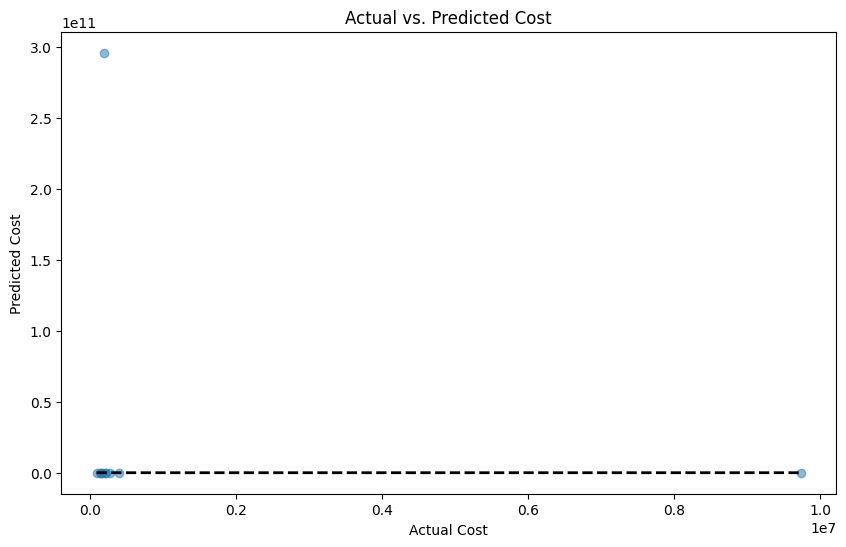

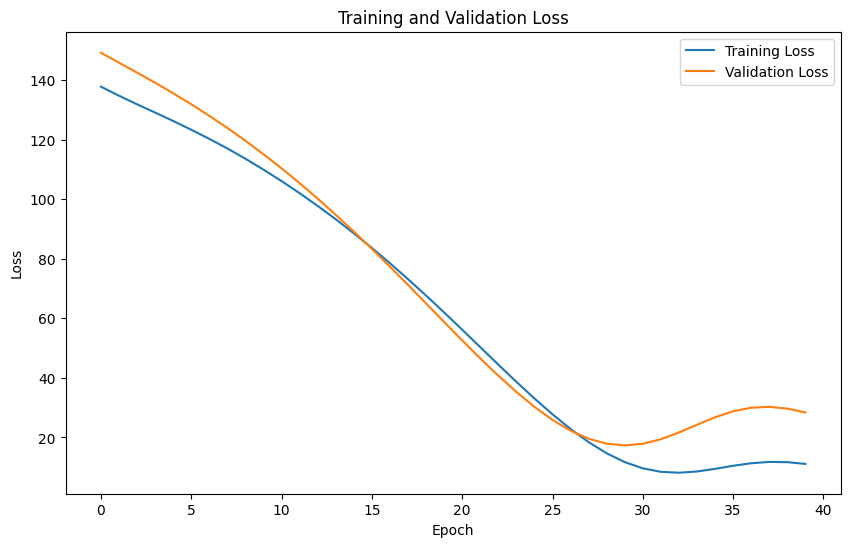

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
file_path = "construction_cost_prediction.csv"
data = pd.read_csv(file_path)

# Correct the typo in column name
data.rename(columns={'number of units ': 'number of units'}, inplace=True)

# Fix inconsistencies in categorical variables
data['building function'] = data['building function'].str.lower()

# Separate features and target variable
X = data.drop(columns=['total project cost'])
y = data['total project cost']

# Log transform the target variable
y = np.log1p(y)

# Identify categorical and numerical columns
categorical_features = ['building function']
numerical_features = ['building height', 'builtup area', 'number of stories', 'number of columns', 'number of rooms', 'number of units']

# Preprocess the data: OneHotEncoding for categorical features and StandardScaling for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X_preprocessed = preprocessor.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Build the ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2, callbacks=[early_stopping], verbose=0)

# Evaluate the model on test data
mse, mae = model.evaluate(X_test, y_test)
print("Mean Squared Error on Testing Data:", mse)
print("Mean Absolute Error on Testing Data:", mae)

# Predict on test data
y_pred = model.predict(X_test).flatten()

# Inverse log transform the predictions and the actual values
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)

# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_exp, y_pred_exp, alpha=0.5)
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("Actual vs. Predicted Cost")
plt.plot([y_test_exp.min(), y_test_exp.max()], [y_test_exp.min(), y_test_exp.max()], 'k--', lw=2)
plt.show()

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
file_path = "construction_cost_prediction.csv"
data = pd.read_csv(file_path)

# Correct the typo in column name
data.rename(columns={'number of units ': 'number of units'}, inplace=True)

# Fix inconsistencies in categorical variables
data['building function'] = data['building function'].str.lower()

# Separate features and target variable
X = data.drop(columns=['total project cost'])
y = data['total project cost']

# Log transform the target variable
y = np.log1p(y)

# Identify categorical and numerical columns
categorical_features = ['building function']
numerical_features = ['building height', 'builtup area', 'number of stories', 'number of columns', 'number of rooms', 'number of units']

# Preprocess the data: OneHotEncoding for categorical features and StandardScaling for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X_preprocessed = preprocessor.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Build the ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=20, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=500, validation_split=0.2, callbacks=[early_stopping], verbose=0)

# Evaluate the model on test data
mse, mae = model.evaluate(X_test, y_test)
print("Mean Squared Error on Testing Data:", mse)
print("Mean Absolute Error on Testing Data:", mae)

# Predict on test data
y_pred = model.predict(X_test).flatten()

# Inverse log transform the predictions and the actual values
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)

# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_exp, y_pred_exp, alpha=0.5)
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("Actual vs. Predicted Cost")
plt.plot([y_test_exp.min(), y_test_exp.max()], [y_test_exp.min(), y_test_exp.max()], 'k--', lw=2)
plt.show()

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


C:\Users\Augah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
# file_path = "drive/MyDrive/Colab Notebooks/construction_cost_prediction.csv"
# data = pd.read_csv(file_path)

# # Correct the typo in column name
# data.rename(columns={'number of units ': 'number of units'}, inplace=True)

# # Fix inconsistencies in categorical variables
# data['building function'] = data['building function'].str.lower()

# # Separate features and target variable
# X = data.drop(columns=['total project cost'])
# y = data['total project cost']

# # Log transform the target variable
# y = np.log1p(y)

# # Identify categorical and numerical columns
# categorical_features = ['building function']
# numerical_features = ['building height', 'builtup area', 'number of stories', 'number of columns', 'number of rooms', 'number of units']

# # Preprocess the data: OneHotEncoding for categorical features and StandardScaling for numerical features
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numerical_features),
#         ('cat', OneHotEncoder(), categorical_features)
#     ])

# X_preprocessed = preprocessor.fit_transform(X)

# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Build the ANN model
# model = Sequential([
#     Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
#     Dropout(0.3),
#     Dense(128, activation='relu'),
#     Dropout(0.3),
#     Dense(64, activation='relu'),
#     Dense(1)
# ])

# # Compile the model
# optimizer = Adam(learning_rate=0.0001)
# model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

# # Define early stopping to prevent overfitting
# early_stopping = EarlyStopping(patience=20, restore_best_weights=True)

# # Train the model
# history = model.fit(X_train, y_train, epochs=500, validation_split=0.2, callbacks=[early_stopping], verbose=0)

# # Evaluate the model on test data
# mse, mae = model.evaluate(X_test, y_test)
# print("Mean Squared Error on Testing Data:", mse)
# print("Mean Absolute Error on Testing Data:", mae)

# # Predict on test data
# y_pred = model.predict(X_test).flatten()

# # Inverse log transform the predictions and the actual values
# y_test_exp = np.expm1(y_test)
# y_pred_exp = np.expm1(y_pred)

# Visualize actual vs. predicted values
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test_exp, y_pred_exp, alpha=0.5)
# plt.xlabel("Actual Cost")
# plt.ylabel("Predicted Cost")
# plt.title("Actual vs. Predicted Cost")
# plt.plot([y_test_exp.min(), y_test_exp.max()], [y_test_exp.min(), y_test_exp.max()], 'k--', lw=2)
# plt.show()

# # Plot training history
# plt.figure(figsize=(10, 6))
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Training and Validation Loss')
# plt.legend()
# plt.show()


C:\Users\Augah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 30.5600 - mean_absolute_error: 4.2198
Mean Squared Error on Testing Data: 30.560028076171875
Mean Absolute Error on Testing Data: 4.219773769378662
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


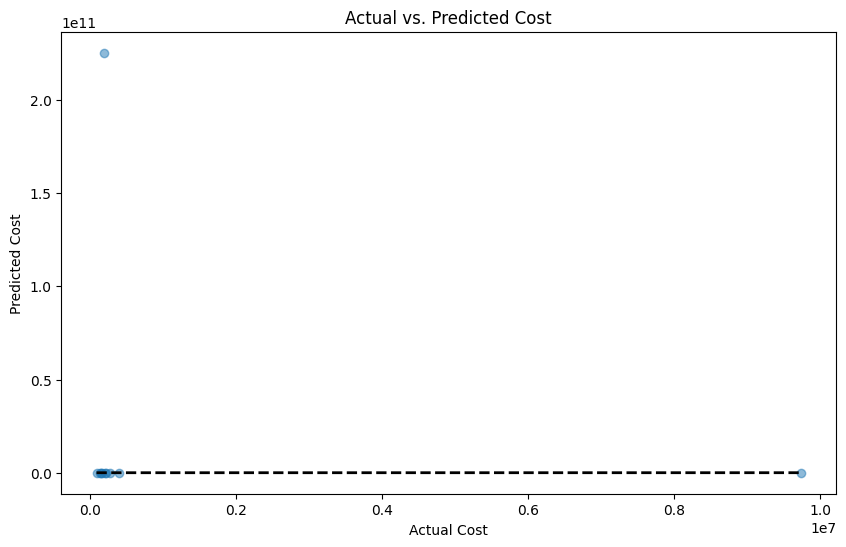

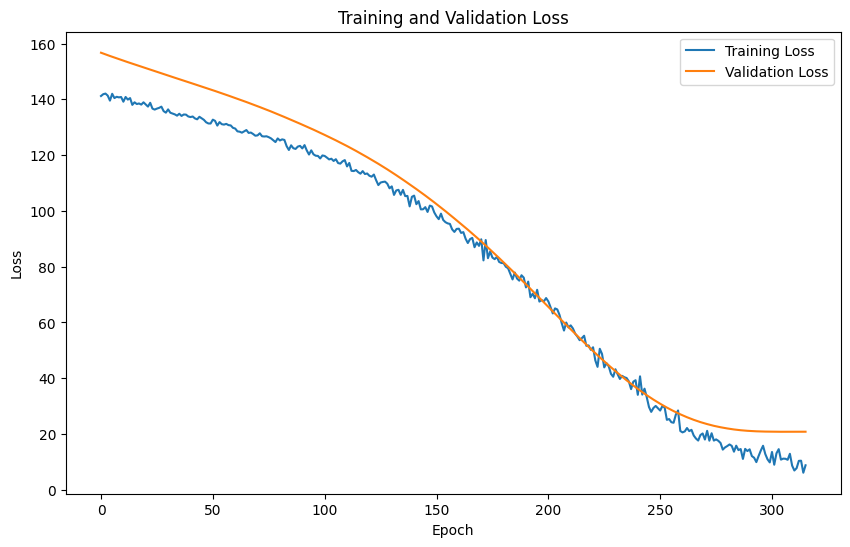

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load the dataset
file_path = "construction_cost_prediction.csv"
data = pd.read_csv(file_path)

# Correct the typo in column name
data.rename(columns={'number of units ': 'number of units'}, inplace=True)

# Fix inconsistencies in categorical variables
data['building function'] = data['building function'].str.lower()

# Separate features and target variable
X = data.drop(columns=['total project cost'])
y = data['total project cost']

# Log transform the target variable
y = np.log1p(y)

# Identify categorical and numerical columns
categorical_features = ['building function']
numerical_features = ['building height', 'builtup area', 'number of stories', 'number of columns', 'number of rooms', 'number of units']

# Preprocess the data: OneHotEncoding for categorical features and StandardScaling for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X_preprocessed = preprocessor.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Build the ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.4),  # Increased dropout rate
    Dense(128, activation='relu'),
    Dropout(0.4),  # Increased dropout rate
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Train the model
history = model.fit(X_train, y_train, epochs=500, validation_split=0.2, callbacks=[early_stopping, reduce_lr], verbose=0)

# Evaluate the model on test data
mse, mae = model.evaluate(X_test, y_test)
print("Mean Squared Error on Testing Data:", mse)
print("Mean Absolute Error on Testing Data:", mae)

# Predict on test data
y_pred = model.predict(X_test).flatten()

# Inverse log transform the predictions and the actual values
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)

# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_exp, y_pred_exp, alpha=0.5)
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("Actual vs. Predicted Cost")
plt.plot([y_test_exp.min(), y_test_exp.max()], [y_test_exp.min(), y_test_exp.max()], 'k--', lw=2)
plt.show()

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


C:\Users\Augah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 27.2429 - mean_absolute_error: 4.4585
Mean Squared Error on Testing Data: 27.242923736572266
Mean Absolute Error on Testing Data: 4.458469867706299
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


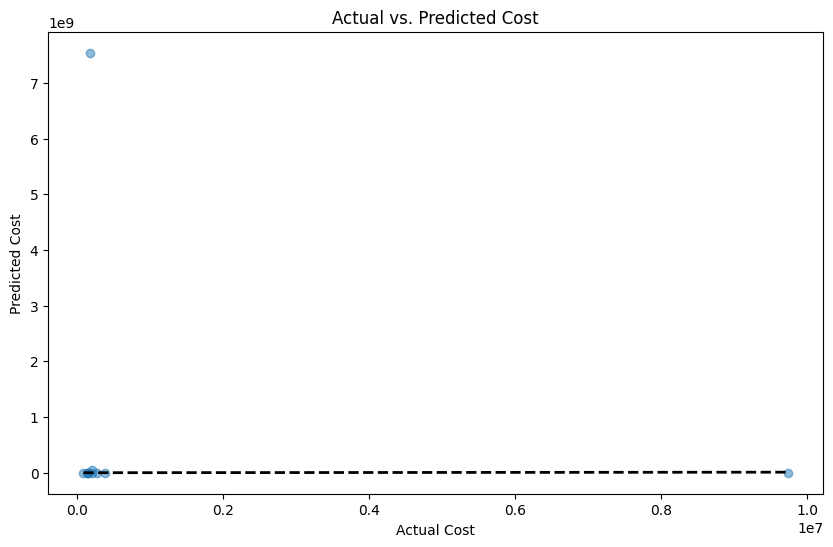

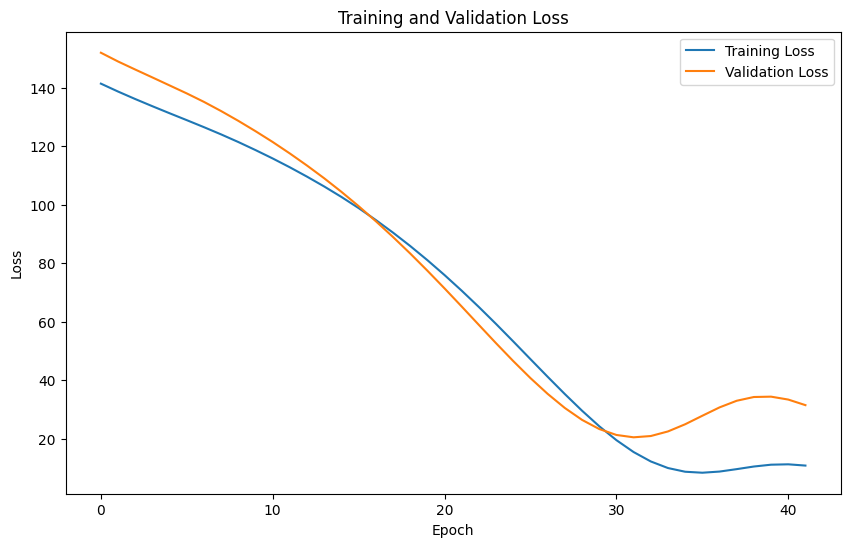

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
file_path = "construction_cost_prediction.csv"
data = pd.read_csv(file_path)

# Correct the typo in column name
data.rename(columns={'number of units ': 'number of units'}, inplace=True)

# Fix inconsistencies in categorical variables
data['building function'] = data['building function'].str.lower()

# Separate features and target variable
X = data.drop(columns=['total project cost'])
y = data['total project cost']

# Log transform the target variable
y = np.log1p(y)

# Identify categorical and numerical columns
categorical_features = ['building function']
numerical_features = ['building height', 'builtup area', 'number of stories', 'number of columns', 'number of rooms', 'number of units']

# Preprocess the data: OneHotEncoding for categorical features and StandardScaling for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X_preprocessed = preprocessor.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Build the ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2, callbacks=[early_stopping], verbose=0)

# Evaluate the model on test data
mse, mae = model.evaluate(X_test, y_test)
print("Mean Squared Error on Testing Data:", mse)
print("Mean Absolute Error on Testing Data:", mae)

# Predict on test data
y_pred = model.predict(X_test).flatten()

# Inverse log transform the predictions and the actual values
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)

# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_exp, y_pred_exp, alpha=0.5)
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("Actual vs. Predicted Cost")
plt.plot([y_test_exp.min(), y_test_exp.max()], [y_test_exp.min(), y_test_exp.max()], 'k--', lw=2)
plt.show()

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load the dataset
file_path = "construction_cost_prediction.csv"
data = pd.read_csv(file_path)

# Correct the typo in column name
data.rename(columns={'number of units ': 'number of units'}, inplace=True)

# Fix inconsistencies in categorical variables
data['building function'] = data['building function'].str.lower()

# Separate features and target variable
X = data.drop(columns=['total project cost'])
y = data['total project cost']

# Log transform the target variable
y = np.log1p(y)

# Identify categorical and numerical columns
categorical_features = ['building function']
numerical_features = ['building height', 'builtup area', 'number of stories', 'number of columns', 'number of rooms', 'number of units']

# Preprocess the data: OneHotEncoding for categorical features and StandardScaling for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X_preprocessed = preprocessor.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Build the ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.4),  # Increased dropout rate
    Dense(128, activation='relu'),
    Dropout(0.4),  # Increased dropout rate
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Train the model
history = model.fit(X_train, y_train, epochs=500, validation_split=0.2, callbacks=[early_stopping, reduce_lr], verbose=0)

# Evaluate the model on test data
mse, mae = model.evaluate(X_test, y_test)
print("Mean Squared Error on Testing Data:", mse)
print("Mean Absolute Error on Testing Data:", mae)

# Predict on test data
y_pred = model.predict(X_test).flatten()

# Inverse log transform the predictions and the actual values
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)

# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_exp, y_pred_exp, alpha=0.5)
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("Actual vs. Predicted Cost")
plt.plot([y_test_exp.min(), y_test_exp.max()], [y_test_exp.min(), y_test_exp.max()], 'k--', lw=2)
plt.show()

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


C:\Users\Augah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


KeyboardInterrupt: 

C:\Users\Augah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 19.1558 - mean_absolute_error: 2.9397
Mean Squared Error on Testing Data: 19.155750274658203
Mean Absolute Error on Testing Data: 2.939735174179077
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


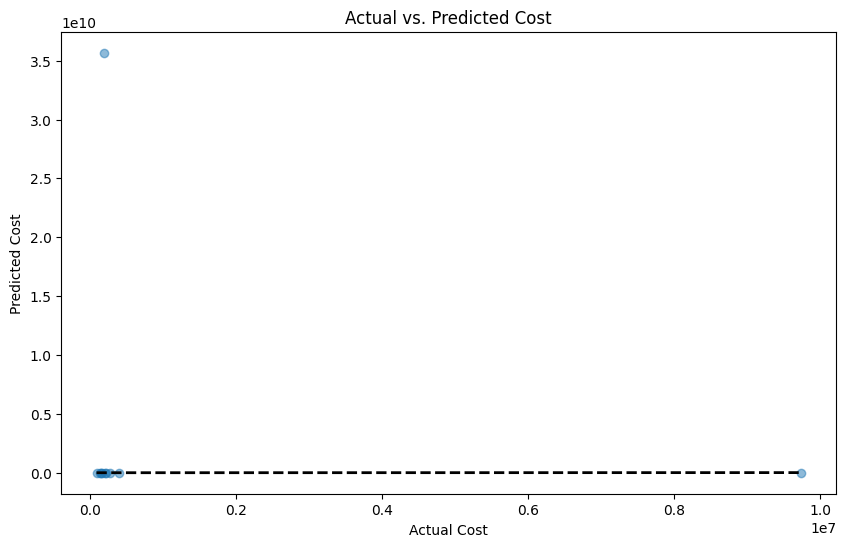

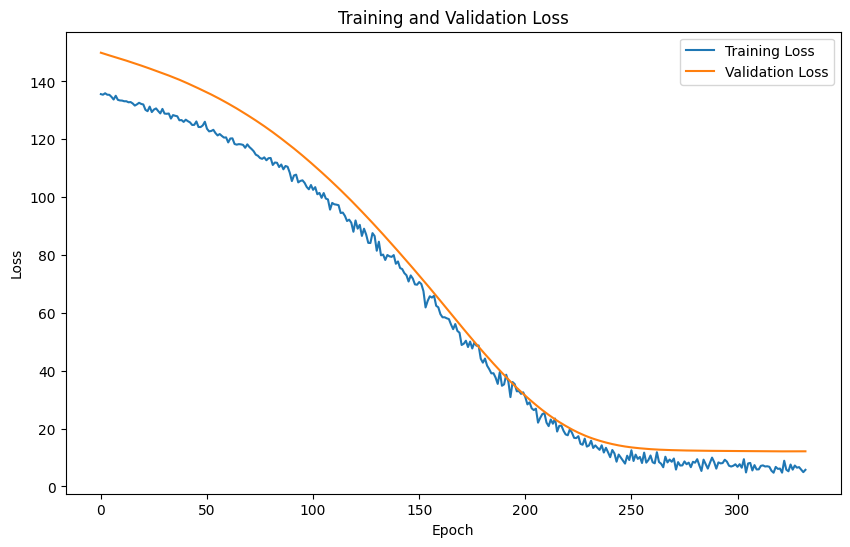

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load the dataset
file_path = "construction_cost_prediction.csv"
data = pd.read_csv(file_path)

# Correct the typo in column name
data.rename(columns={'number of units ': 'number of units'}, inplace=True)

# Fix inconsistencies in categorical variables
data['building function'] = data['building function'].str.lower()

# Separate features and target variable
X = data.drop(columns=['total project cost'])
y = data['total project cost']

# Log transform the target variable
y = np.log1p(y)

# Identify categorical and numerical columns
categorical_features = ['building function']
numerical_features = ['building height', 'builtup area', 'number of stories', 'number of columns', 'number of rooms', 'number of units']

# Preprocess the data: OneHotEncoding for categorical features and StandardScaling for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X_preprocessed = preprocessor.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Build the ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # Adjust dropout rate
    Dense(128, activation='relu'),
    Dropout(0.3),  # Adjust dropout rate
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Train the model
history = model.fit(X_train, y_train, epochs=500, validation_split=0.2, callbacks=[early_stopping, reduce_lr], verbose=0)

# Evaluate the model on test data
mse, mae = model.evaluate(X_test, y_test)
print("Mean Squared Error on Testing Data:", mse)
print("Mean Absolute Error on Testing Data:", mae)

# Predict on test data
y_pred = model.predict(X_test).flatten()

# Inverse log transform the predictions and the actual values
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)

# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_exp, y_pred_exp, alpha=0.5)
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("Actual vs. Predicted Cost")
plt.plot([y_test_exp.min(), y_test_exp.max()], [y_test_exp.min(), y_test_exp.max()], 'k--', lw=2)
plt.show()

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


Outliers:     building height  builtup area  number of stories  number of columns  \
39             6.46        1154.0                  2                 62   
42             9.04        1739.0                  2                 70   
43             9.04        1739.0                  2                 78   
44            18.00         542.0                  4                 35   

    number of rooms              building function  number of units  \
39               30                         hostel                4   
42               38  cardiology  hospital building                1   
43               30    oncology hospital building                 1   
44              128              university hostel                2   

    total project cost  
39          9139990.00  
42          8695123.45  
43          9738413.50  
44          4119263.00  
Original data size: (48, 8)
Cleaned data size: (44, 8)


C:\Users\Augah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 15.7998 - mean_absolute_error: 3.2505
Mean Squared Error on Testing Data: 15.799802780151367
Mean Absolute Error on Testing Data: 3.2505416870117188
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


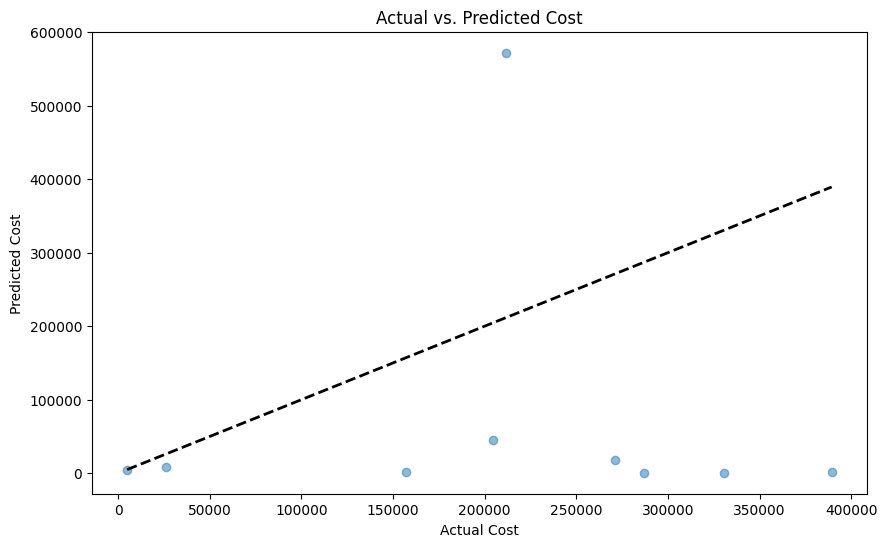

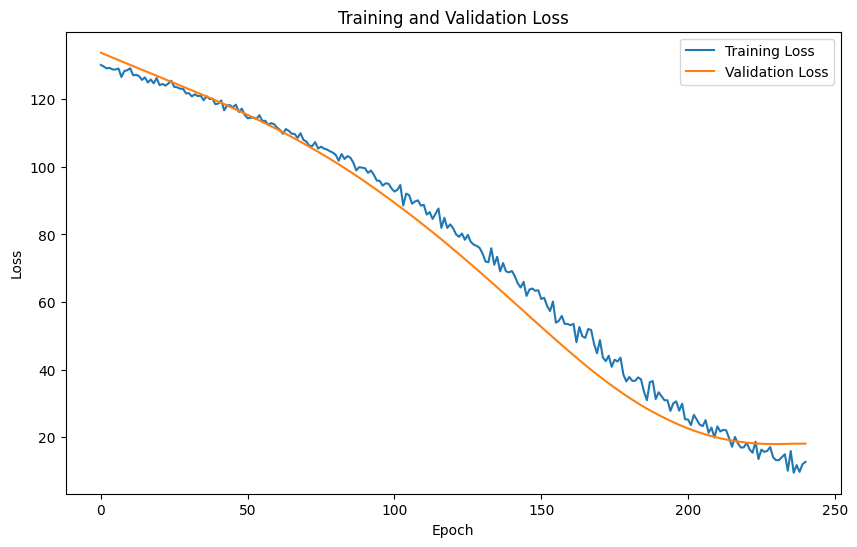

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load the dataset
file_path = "construction_cost_prediction.csv"
data = pd.read_csv(file_path)

# Correct the typo in column name
data.rename(columns={'number of units ': 'number of units'}, inplace=True)

# Fix inconsistencies in categorical variables
data['building function'] = data['building function'].str.lower()

# Function to identify outliers
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Identify and print outliers
outliers = identify_outliers(data, 'total project cost')
print(f"Outliers: {outliers}")

# Function to remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers
data_clean = remove_outliers(data, 'total project cost')
print(f"Original data size: {data.shape}")
print(f"Cleaned data size: {data_clean.shape}")

# Separate features and target variable
X = data_clean.drop(columns=['total project cost'])
y = data_clean['total project cost']

# Log transform the target variable
y = np.log1p(y)

# Identify categorical and numerical columns
categorical_features = ['building function']
numerical_features = ['building height', 'builtup area', 'number of stories', 'number of columns', 'number of rooms', 'number of units']

# Preprocess the data: OneHotEncoding for categorical features and StandardScaling for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X_preprocessed = preprocessor.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Build the ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Train the model
history = model.fit(X_train, y_train, epochs=500, validation_split=0.2, callbacks=[early_stopping, reduce_lr], verbose=0)

# Evaluate the model on test data
mse, mae = model.evaluate(X_test, y_test)
print("Mean Squared Error on Testing Data:", mse)
print("Mean Absolute Error on Testing Data:", mae)

# Predict on test data
y_pred = model.predict(X_test).flatten()

# Inverse log transform the predictions and the actual values
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)

# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_exp, y_pred_exp, alpha=0.5)
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("Actual vs. Predicted Cost")
plt.plot([y_test_exp.min(), y_test_exp.max()], [y_test_exp.min(), y_test_exp.max()], 'k--', lw=2)
plt.show()

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


Outliers:     building height  builtup area  number of stories  number of columns  \
39             6.46        1154.0                  2                 62   
42             9.04        1739.0                  2                 70   
43             9.04        1739.0                  2                 78   
44            18.00         542.0                  4                 35   

    number of rooms              building function  number of units  \
39               30                         hostel                4   
42               38  cardiology  hospital building                1   
43               30    oncology hospital building                 1   
44              128              university hostel                2   

    total project cost  
39          9139990.00  
42          8695123.45  
43          9738413.50  
44          4119263.00  
Original data size: (48, 8)
Cleaned data size: (44, 8)


C:\Users\Augah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 71.8060 - mean_absolute_error: 7.8271
Mean Squared Error on Testing Data: 71.80599975585938
Mean Absolute Error on Testing Data: 7.827094078063965
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


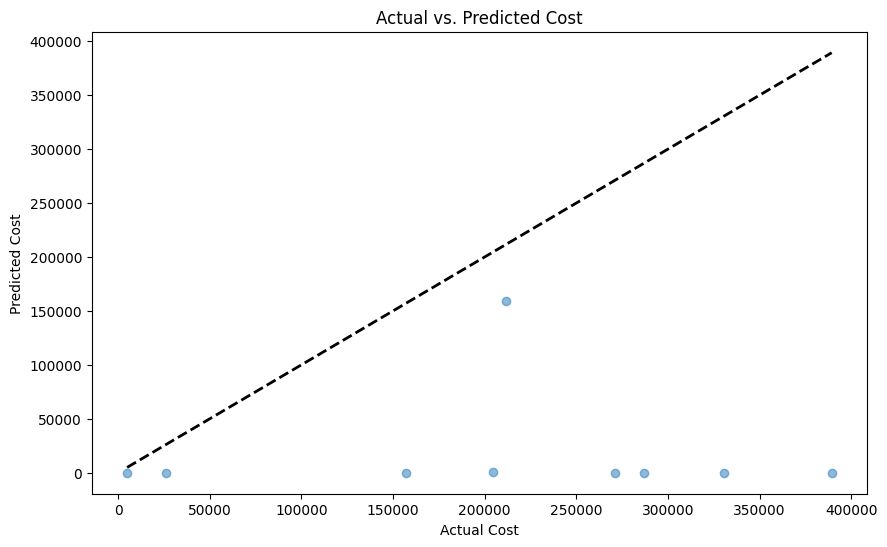

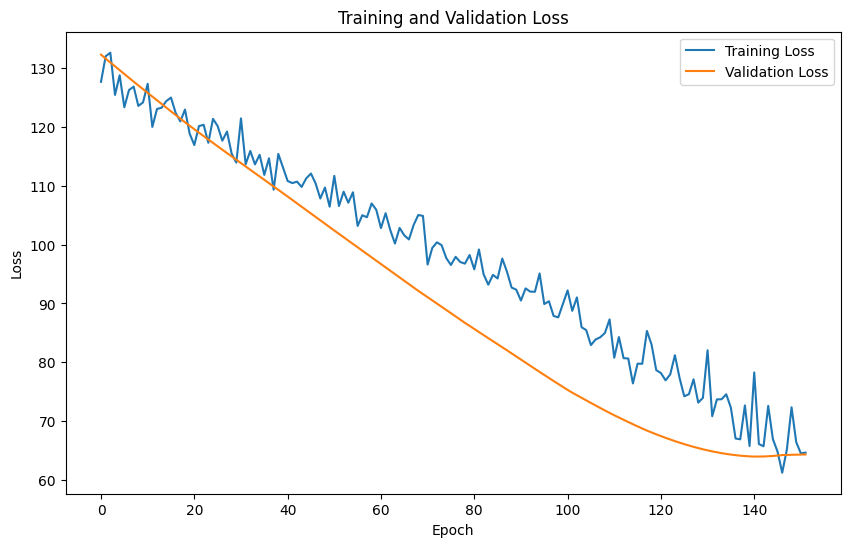

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load the dataset
file_path = "construction_cost_prediction.csv"
data = pd.read_csv(file_path)

# Correct the typo in column name
data.rename(columns={'number of units ': 'number of units'}, inplace=True)

# Fix inconsistencies in categorical variables
data['building function'] = data['building function'].str.lower()

# Function to identify outliers
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Identify and print outliers
outliers = identify_outliers(data, 'total project cost')
print(f"Outliers: {outliers}")

# Function to remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers
data_clean = remove_outliers(data, 'total project cost')
print(f"Original data size: {data.shape}")
print(f"Cleaned data size: {data_clean.shape}")

# Separate features and target variable
X = data_clean.drop(columns=['total project cost'])
y = data_clean['total project cost']

# Log transform the target variable
y = np.log1p(y)

# Identify categorical and numerical columns
categorical_features = ['building function']
numerical_features = ['building height', 'builtup area', 'number of stories', 'number of columns', 'number of rooms', 'number of units']

# Preprocess the data: OneHotEncoding for categorical features and StandardScaling for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X_preprocessed = preprocessor.fit_transform(X)

# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_preprocessed = poly.fit_transform(X_preprocessed)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Build the ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Train the model
history = model.fit(X_train, y_train, epochs=500, validation_split=0.2, callbacks=[early_stopping, reduce_lr], verbose=0)

# Evaluate the model on test data
mse, mae = model.evaluate(X_test, y_test)
print("Mean Squared Error on Testing Data:", mse)
print("Mean Absolute Error on Testing Data:", mae)

# Predict on test data
y_pred = model.predict(X_test).flatten()

# Inverse log transform the predictions and the actual values
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)

# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_exp, y_pred_exp, alpha=0.5)
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("Actual vs. Predicted Cost")
plt.plot([y_test_exp.min(), y_test_exp.max()], [y_test_exp.min(), y_test_exp.max()], 'k--', lw=2)
plt.show()

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


Outliers:     building height  builtup area  number of stories  number of columns  \
39             6.46        1154.0                  2                 62   
42             9.04        1739.0                  2                 70   
43             9.04        1739.0                  2                 78   
44            18.00         542.0                  4                 35   

    number of rooms              building function  number of units  \
39               30                         hostel                4   
42               38  cardiology  hospital building                1   
43               30    oncology hospital building                 1   
44              128              university hostel                2   

    total project cost  
39          9139990.00  
42          8695123.45  
43          9738413.50  
44          4119263.00  
Original data size: (48, 8)
Cleaned data size: (44, 8)


C:\Users\Augah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 57.4444 - mean_absolute_error: 7.2697
Mean Squared Error on Testing Data: 57.44435501098633
Mean Absolute Error on Testing Data: 7.269663333892822
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


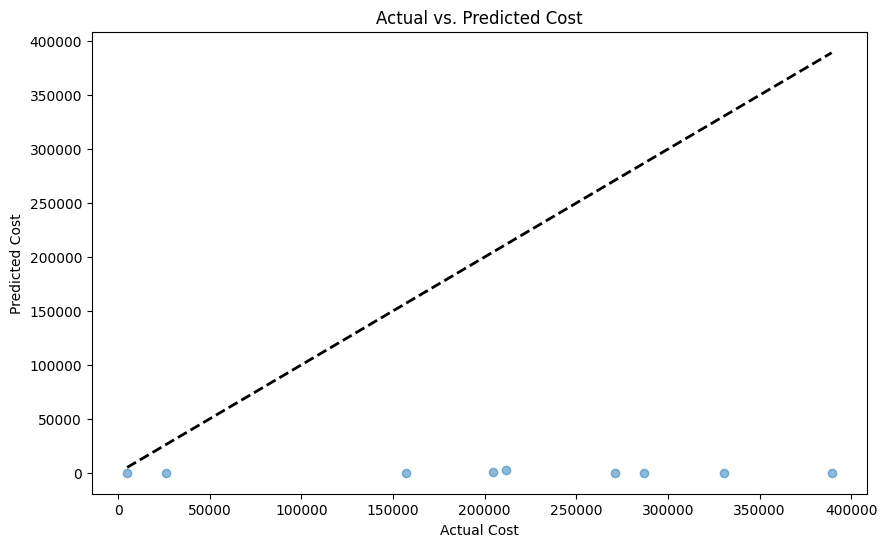

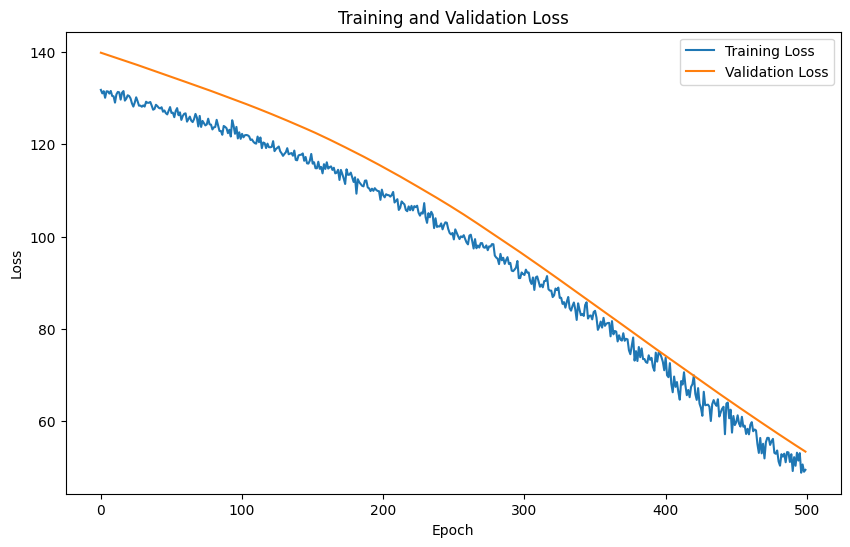

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load the dataset
file_path = "construction_cost_prediction.csv"
data = pd.read_csv(file_path)

# Correct the typo in column name
data.rename(columns={'number of units ': 'number of units'}, inplace=True)

# Fix inconsistencies in categorical variables
data['building function'] = data['building function'].str.lower()

# Function to identify outliers
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Identify and print outliers
outliers = identify_outliers(data, 'total project cost')
print(f"Outliers: {outliers}")

# Function to remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers
data_clean = remove_outliers(data, 'total project cost')
print(f"Original data size: {data.shape}")
print(f"Cleaned data size: {data_clean.shape}")

# Separate features and target variable
X = data_clean.drop(columns=['total project cost'])
y = data_clean['total project cost']

# Log transform the target variable
y = np.log1p(y)

# Identify categorical and numerical columns
categorical_features = ['building function']
numerical_features = ['building height', 'builtup area', 'number of stories', 'number of columns', 'number of rooms', 'number of units']

# Preprocess the data: OneHotEncoding for categorical features and StandardScaling for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X_preprocessed = preprocessor.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Build the ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Train the model
history = model.fit(X_train, y_train, epochs=500, validation_split=0.2, callbacks=[early_stopping, reduce_lr], verbose=0)

# Evaluate the model on test data
mse, mae = model.evaluate(X_test, y_test)
print("Mean Squared Error on Testing Data:", mse)
print("Mean Absolute Error on Testing Data:", mae)

# Predict on test data
y_pred = model.predict(X_test).flatten()

# Inverse log transform the predictions and the actual values
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)

# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_exp, y_pred_exp, alpha=0.5)
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("Actual vs. Predicted Cost")
plt.plot([y_test_exp.min(), y_test_exp.max()], [y_test_exp.min(), y_test_exp.max()], 'k--', lw=2)
plt.show()

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


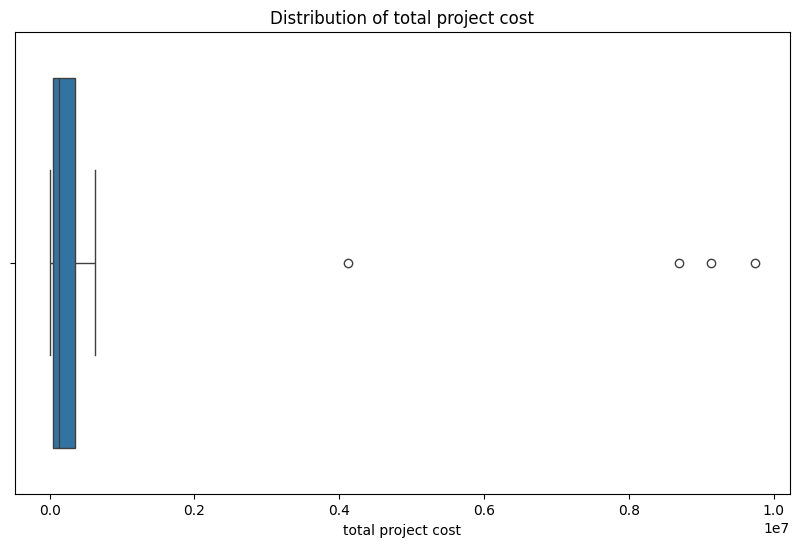

IQR Outliers: 4
Z-score Outliers: 3


C:\Users\Augah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 16.7338 - mean_absolute_error: 3.5046
Mean Squared Error on Testing Data: 16.733762741088867
Mean Absolute Error on Testing Data: 3.5046334266662598
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import zscore
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau



# Load the dataset
file_path = "construction_cost_prediction.csv"
data = pd.read_csv(file_path)

# Correct the typo in column name
data.rename(columns={'number of units ': 'number_of_units',
                      "building height": "building_height",
                      "builtup area": "builtup_area",
                      "number of stories": "number_of_stories",
                      "number of columns": "number_of_columns",
                      "number of rooms": "number_of_rooms",
                      

                        }, inplace=True)

# Fix inconsistencies in categorical variables
data['building function'] = data['building function'].str.lower()
data.rename(columns= {"building function": "building_function"}, inplace= True)
data

# Plot distributions to detect outliers
def plot_distributions(df, column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Distribution of {column}')
    plt.show()

# Plot the distribution of the target variable
plot_distributions(data, 'total project cost')

# Function to identify outliers using IQR
def identify_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Function to identify outliers using Z-score
def identify_outliers_zscore(df, column, threshold=3):
    z_scores = zscore(df[column])
    return df[np.abs(z_scores) > threshold]

# Identify outliers using both methods
outliers_iqr = identify_outliers_iqr(data, 'total project cost')
outliers_zscore = identify_outliers_zscore(data, 'total project cost')

print(f"IQR Outliers: {outliers_iqr.shape[0]}")
print(f"Z-score Outliers: {outliers_zscore.shape[0]}")

# Removing outliers using IQR method
data_clean = data.drop(outliers_iqr.index)

# Separate features and target variable
X = data_clean.drop(columns=['total project cost'])
y = data_clean['total project cost']

# Log transform the target variable
y = np.log1p(y)

# Identify categorical and numerical columns
categorical_features = ['building_function']
numerical_features = ['building_height', 'builtup_area', 'number_of_stories', 'number_of_columns', 'number_of_rooms', 'number_of_units']

# Preprocess the data: OneHotEncoding for categorical features and StandardScaling for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

transformer = preprocessor.fit(X)

X_preprocessed = preprocessor.fit_transform(X)


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Build a simpler ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Train the model
history = model.fit(X_train, y_train, epochs=500, validation_split=0.2, callbacks=[early_stopping, reduce_lr], verbose=0)

# Evaluate the model on test data
mse, mae = model.evaluate(X_test, y_test)
print("Mean Squared Error on Testing Data:", mse)
print("Mean Absolute Error on Testing Data:", mae)

# Predict on test data
y_pred = model.predict(X_test).flatten()

# Inverse log transform the predictions and the actual values
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)

# Visualize actual vs. predicted values
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test_exp, y_pred_exp, alpha=0.5)
# plt.xlabel("Actual Cost")
# plt.ylabel("Predicted Cost")
# plt.title("Actual vs. Predicted Cost")
# plt.plot([y_test_exp.min(), y_test_exp.max()], [y_test_exp.min(), y_test_exp.max()], 'k--', lw=2)
# plt.show()

# # Plot training history
# plt.figure(figsize=(10, 6))
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Training and Validation Loss')
# plt.legend()
# plt.show()



In [3]:
import pickle


with open('transformer.pkl', 'wb') as f:
    pickle.dump(transformer, f)
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# from scipy.stats import zscore
# import seaborn as sns
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# # Load the dataset
# file_path = "construction_cost_prediction.csv"
# data = pd.read_csv(file_path)

# # Correct the typo in column name
# data.rename(columns={'number of units ': 'number of units'}, inplace=True)

# # Fix inconsistencies in categorical variables
# data['building function'] = data['building function'].str.lower()

# # Plot distributions to detect outliers
# def plot_distributions(df, column):
#     plt.figure(figsize=(10, 6))
#     sns.boxplot(x=df[column])
#     plt.title(f'Distribution of {column}')
#     plt.show()

# # Plot the distribution of the target variable
# plot_distributions(data, 'total project cost')

# # Function to identify outliers using IQR
# def identify_outliers_iqr(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# # Function to identify outliers using Z-score
# def identify_outliers_zscore(df, column, threshold=3):
#     z_scores = zscore(df[column])
#     return df[np.abs(z_scores) > threshold]

# # Identify outliers using both methods
# outliers_iqr = identify_outliers_iqr(data, 'total project cost')
# outliers_zscore = identify_outliers_zscore(data, 'total project cost')

# print(f"IQR Outliers: {outliers_iqr.shape[0]}")
# print(f"Z-score Outliers: {outliers_zscore.shape[0]}")

# # Removing outliers using IQR method
# data_clean = data.drop(outliers_iqr.index)

# # Separate features and target variable
# X = data_clean.drop(columns=['total project cost'])
# y = data_clean['total project cost']

# # Log transform the target variable
# y = np.log1p(y)

# # Identify categorical and numerical columns
# categorical_features = ['building function']
# numerical_features = ['building height', 'builtup area', 'number of stories', 'number of columns', 'number of rooms', 'number of units']

# # Preprocess the data: OneHotEncoding for categorical features and StandardScaling for numerical features
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numerical_features),
#         ('cat', OneHotEncoder(), categorical_features)
#     ])

# X_preprocessed = preprocessor.fit_transform(X)

# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# # Build a simpler ANN model
# model = Sequential([
#     Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
#     Dense(32, activation='relu'),
#     Dense(1)
# ])

# # Compile the model
# optimizer = Adam(learning_rate=0.0001)
# model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

# # Define early stopping to prevent overfitting
# early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# # Train the model
# history = model.fit(X_train, y_train, epochs=500, validation_split=0.2, callbacks=[early_stopping, reduce_lr], verbose=0)

# # Evaluate the model on test data
# mse, mae = model.evaluate(X_test, y_test)
# print("Mean Squared Error on Testing Data:", mse)
# print("Mean Absolute Error on Testing Data:", mae)

# # Predict on test data
# y_pred = model.predict(X_test).flatten()

# # Inverse log transform the predictions and the actual values
# y_test_exp = np.expm1(y_test)
# y_pred_exp = np.expm1(y_pred)

# # Visualize actual vs. predicted values
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test_exp, y_pred_exp, alpha=0.5)
# plt.xlabel("Actual Cost")
# plt.ylabel("Predicted Cost")
# plt.title("Actual vs. Predicted Cost")
# plt.plot([y_test_exp.min(), y_test_exp.max()], [y_test_exp.min(), y_test_exp.max()], 'k--', lw=2)
# plt.show()

# # Plot training history
# plt.figure(figsize=(10, 6))
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Training and Validation Loss')
# plt.legend()
# plt.show()
# # 

In [13]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

xgboost = xgb.XGBRegressor().fit(X_train, y_train)
y_pred = xgboost.predict(X_test)
# mean_absolute_error(y_pred= y_pred, y_true=y_test)
mean_squared_error(y_pred= y_pred, y_true=y_test)


1.3874044232524232

In [14]:
pd.DataFrame({"y_test": y_test, "y_pred": y_pred})

,y_test,y_pred
37,12.510030,11.878288
24,11.965921,10.758700
25,12.872181,12.808728
36,12.567667,10.616651
34,8.503005,9.923134
41,12.708101,11.404954
4,12.228249,13.198319
12,12.262718,10.829665
8,10.178914,10.510625


In [ ]:
X

,building height,builtup area,number of stories,number of columns,number of rooms,building function,number of units
0,2.950,25.00,1,0,3,residential,1
1,3.004,140.00,1,2,11,residential,1
2,2.700,315.00,1,0,16,rural health clinic,1
3,3.000,207.00,1,0,8,residential,1
4,6.000,2375.00,1,22,2,church steel structure,1
5,6.200,2337.00,1,20,1,warehouse,1
6,4.998,320.00,1,0,13,chain of shops,1
7,10.230,364.00,3,12,5,mall,1
8,3.239,180.00,1,0,7,residential,1
9,2.500,245.32,1,0,13,residential,1
